# INTRODUCTION

# EXPLORATORY DATA ANALYSIS

## Business understanding of the problem

## Loading & First exploration

### Preliminary loading 

In [1]:
#Loading the necessary packages
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [6]:
#Loading the datasets
df_airport = pd.read_csv("Raw_data/training_set_airport_data.csv")
df_geographic = pd.read_csv("Prepared_data/new_geographic_data.csv", sep = ";")
df_weather = pd.read_csv("Raw_data/Weather_data/weather_data_train_set.csv")
df_aircraft = pd.read_excel("AC_info/ACchar.xlsx")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### EDA of the training set airport data

In [7]:
df_airport.head()

,Flight Datetime,Aircraft Model,AOBT,ATOT,Stand,Runway
0,1/1/2015 6:00,B737-800 WINGLETS,1/1/2015 5:56,1/1/2015 6:05,STAND_62,RUNWAY_4
1,1/1/2015 6:10,A320-100/200,1/1/2015 6:08,1/1/2015 6:18,STAND_153,RUNWAY_4
2,1/1/2015 6:15,A320-100/200,1/1/2015 6:08,1/1/2015 6:19,STAND_44,RUNWAY_2
3,1/1/2015 6:20,A320-100/200,1/1/2015 6:24,1/1/2015 6:36,STAND_7,RUNWAY_3
4,1/1/2015 6:20,A319,1/1/2015 6:14,1/1/2015 6:27,STAND_17,RUNWAY_2


In [8]:
#Rename the columns
df_airport.rename(columns={'Flight Datetime':'flight_dt',
                          'Aircraft Model':'aircraft_model'}, 
                 inplace=True)

In [9]:
df_airport.describe()

,flight_dt,aircraft_model,AOBT,ATOT,Stand,Runway
count,543813,543813,543813,543813,543813,543813
unique,244764,143,461674,538720,166,4
top,4/2/2016 5:00,A319,5/7/2015 7:49,8/15/2015 6:36,STAND_61,RUNWAY_2
freq,9,178048,5,3,3453,136375


In [12]:
#Convert date string into date format
df_airport['flight_dt'] =  pd.to_datetime(df_airport['flight_dt'], format='%m/%d/%Y %H:%M')
df_airport['AOBT'] =  pd.to_datetime(df_airport['AOBT'], format='%m/%d/%Y %H:%M')
df_airport['ATOT'] =  pd.to_datetime(df_airport['ATOT'], format='%m/%d/%Y %H:%M')
df_airport.head()

,flight_dt,aircraft_model,AOBT,ATOT,Stand,Runway
0,2015-01-01 06:00:00,B737-800 WINGLETS,2015-01-01 05:56:00,2015-01-01 06:05:00,STAND_62,RUNWAY_4
1,2015-01-01 06:10:00,A320-100/200,2015-01-01 06:08:00,2015-01-01 06:18:00,STAND_153,RUNWAY_4
2,2015-01-01 06:15:00,A320-100/200,2015-01-01 06:08:00,2015-01-01 06:19:00,STAND_44,RUNWAY_2
3,2015-01-01 06:20:00,A320-100/200,2015-01-01 06:24:00,2015-01-01 06:36:00,STAND_7,RUNWAY_3
4,2015-01-01 06:20:00,A319,2015-01-01 06:14:00,2015-01-01 06:27:00,STAND_17,RUNWAY_2


In [17]:
# Create a function that computes the TaxiTime in minutes
def DatetimeToTaxitime(datetime1, datetime2):
    difference = datetime2 - datetime1
    taxitime = difference.value / 6e10
    return taxitime

# Compute the taxitime in the airport dataframe 
df_airport['taxitime'] = df_airport.apply(lambda x: DatetimeToTaxitime(x.AOBT, x.ATOT), axis =1)

In [18]:
df_airport.head()

,flight_dt,aircraft_model,AOBT,ATOT,Stand,Runway,taxitime
0,2015-01-01 06:00:00,B737-800 WINGLETS,2015-01-01 05:56:00,2015-01-01 06:05:00,STAND_62,RUNWAY_4,9.0
1,2015-01-01 06:10:00,A320-100/200,2015-01-01 06:08:00,2015-01-01 06:18:00,STAND_153,RUNWAY_4,10.0
2,2015-01-01 06:15:00,A320-100/200,2015-01-01 06:08:00,2015-01-01 06:19:00,STAND_44,RUNWAY_2,11.0
3,2015-01-01 06:20:00,A320-100/200,2015-01-01 06:24:00,2015-01-01 06:36:00,STAND_7,RUNWAY_3,12.0
4,2015-01-01 06:20:00,A319,2015-01-01 06:14:00,2015-01-01 06:27:00,STAND_17,RUNWAY_2,13.0


In [536]:
df_airport.describe()

,taxitime
count,543813.000000
mean,18.754785
std,8.172083
min,-218.000000
25%,14.000000
50%,18.000000
75%,22.000000
max,656.000000


In [537]:
#NA search: No NA to clean
df_airport.isnull().sum()

flight_dt         0
aircraft_model    0
AOBT              0
ATOT              0
Stand             0
Runway            0
taxitime          0
dtype: int64

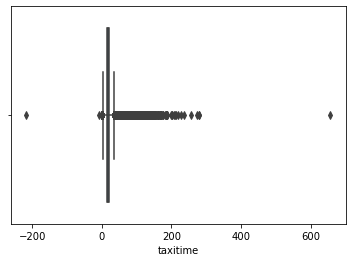

In [19]:
#Outliers search - there seems to some outliers 
# For some outiliers the ATOT is before the AOBT: there is a mistake so we should delete them
# For the others, we will see a strategy to handle the outliers in the data preparation section
ax = sns.boxplot(df_airport["taxitime"])

In [20]:
#Delete the taxitime < 0 (we assume that there is a mistake)
df_airport = df_airport[df_airport["taxitime"] > 0]

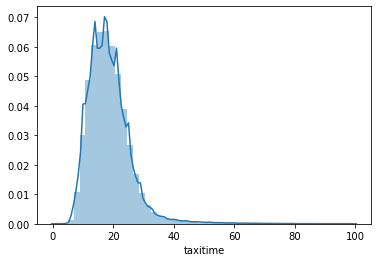

In [21]:
#We observe a quasi normal distribution
sns.distplot(df_airport[df_airport["taxitime"] <100].taxitime)

In [22]:
df_airport1 = df_airport[df_airport['Runway'] == 'RUNWAY_1']
df_airport2 = df_airport[df_airport['Runway'] == 'RUNWAY_2']
df_airport3 = df_airport[df_airport['Runway'] == 'RUNWAY_3']
df_airport4 = df_airport[df_airport['Runway'] == 'RUNWAY_4']

### EDA of the geographic dataset

In [23]:
df_geographic.head()

,runway_stand,Lat_runway,Lng_runway,Lat_stand,Lng_stand
0,RUNWAY_1STAND_1,54.755307,-0.02304,54.764575,0.000356
1,RUNWAY_1STAND_10,54.755307,-0.02304,54.764382,-0.001061
2,RUNWAY_1STAND_100,54.755307,-0.02304,54.766471,0.018516
3,RUNWAY_1STAND_101,54.755307,-0.02304,54.770003,0.020513
4,RUNWAY_1STAND_102,54.755307,-0.02304,54.769606,0.018924


In [24]:
# Create the functions that compute distance between runways & stands in kilometers
def degreesToRadians(degrees):
    return degrees * np.pi / 180

def distanceInKmBetweenCoordinates(lat1, lon1, lat2, lon2):
    earthRadiusKm = 6371;

    dLat = degreesToRadians(lat2-lat1)
    dLon = degreesToRadians(lon2-lon1)

    lat1 = degreesToRadians(lat1)
    lat2 = degreesToRadians(lat2)

    calculation = np.sin(dLat/2) * np.sin(dLat/2) + np.sin(dLon/2) * np.sin(dLon/2) * np.cos(lat1) * np.cos(lat2) 
    distance = 2 * math.atan2(np.sqrt(calculation), np.sqrt(1-calculation))
    return earthRadiusKm * distance

In [25]:
# Compute the distance in the aircraft dataframe
df_geographic['distance'] = df_geographic.apply(lambda x: distanceInKmBetweenCoordinates(x.Lat_runway, x.Lng_runway, x.Lat_stand, x.Lng_stand), axis =1)

In [545]:
df_geographic.describe()

,Lat_runway,Lng_runway,Lat_stand,Lng_stand,distance
count,664.000000,664.000000,664.000000,664.000000,664.000000
mean,54.758773,-0.004747,54.767037,0.009493,1.730470
std,0.002643,0.019280,0.003191,0.009616,0.897515
min,54.755307,-0.024107,54.761081,-0.009674,0.158869
25%,54.756667,-0.023307,54.764575,0.003887,0.992634
50%,54.759147,-0.007360,54.766618,0.009772,1.461001
75%,54.761253,0.011200,54.769606,0.018498,2.578251
max,54.761493,0.019840,54.773947,0.026379,3.321122


In [546]:
#NA search: No NA to clean
df_geographic.isnull().sum()

runway_stand    0
Lat_runway      0
Lng_runway      0
Lat_stand       0
Lng_stand       0
distance        0
dtype: int64

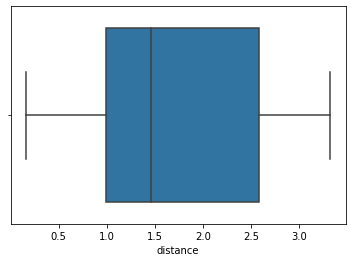

In [547]:
#Outliers search - there seems to be no outlier 
ax = sns.boxplot(df_geographic["distance"])

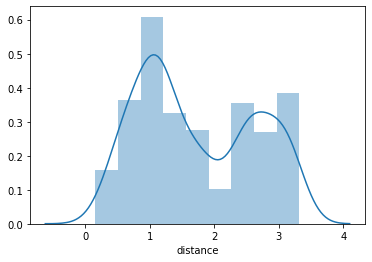

In [548]:
sns.distplot(df_geographic["distance"])

In [26]:
df_geographic = df_geographic[['runway_stand', 'distance']]

### EDA of the weather dataset

In [550]:
df_weather.head()

,time_hourly,summary,icon,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,precipType,precipAccumulation,ozone
0,1/1/2015 6:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,44.65,39.29,42.8,0.93,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4
1,1/1/2015 6:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,44.65,39.29,42.8,0.93,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4
2,1/1/2015 6:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,44.65,39.29,42.8,0.93,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4
3,1/1/2015 6:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,44.65,39.29,42.8,0.93,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4
4,1/1/2015 6:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,44.65,39.29,42.8,0.93,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4


In [27]:
#Convert date string into date format
df_weather['time_hourly'] =  pd.to_datetime(df_weather['time_hourly'], format='%m/%d/%Y %H:%M')

In [28]:
#Rename the columns
df_weather.rename(columns={'time_hourly':'AOBT_hourly'}, 
                 inplace=True)

#Create hourly AOBT in airport data to join with weather data

def hour_rounder(t):
    # Rounds to nearest hour by adding a timedelta hour if minute >= 30
    return (t.replace(second=0, microsecond=0, minute=0, hour=t.hour)
               +timedelta(hours=t.minute//30))

# Compute the distance in the aircraft dataframe
df_airport['AOBT_hourly'] = df_airport.apply(lambda x: hour_rounder(x.AOBT), axis =1)

In [29]:
df_weather = df_weather.drop_duplicates()

In [30]:
df_weather.describe()

,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,precipAccumulation,ozone
count,29481.000000,29481.000000,33823.000000,33823.000000,33824.000000,33823.000000,29406.000000,33807.000000,30218.000000,32959.000000,32878.000000,33264.000000,33799.000000,33824.000000,33824.000000
mean,0.001401,0.037940,53.261394,51.952420,46.217615,0.788989,1015.562310,7.551346,10.969000,195.557845,0.519742,1.183862,6.097705,0.000012,314.011761
std,0.008215,0.146128,10.985435,12.514141,9.080322,0.154517,10.608472,4.600294,7.991617,93.995074,0.294911,1.790903,1.502209,0.000992,21.054959
min,0.000000,0.000000,17.670000,10.380000,12.190000,0.250000,971.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031000,0.000000,212.500000
25%,0.000000,0.000000,45.600000,42.150000,39.220000,0.680000,1009.600000,4.690000,5.660000,124.000000,0.190000,0.000000,6.216000,0.000000,310.400000
50%,0.000000,0.000000,52.620000,52.620000,46.410000,0.820000,1016.700000,6.930000,9.180000,220.000000,0.480000,0.000000,6.216000,0.000000,310.400000
75%,0.000000,0.000000,60.860000,60.860000,53.590000,0.930000,1022.600000,10.290000,14.050000,260.000000,0.750000,2.000000,6.216000,0.000000,310.400000
max,0.332800,1.000000,93.510000,96.700000,69.450000,1.000000,1045.700000,33.120000,51.310000,359.000000,1.000000,9.000000,10.000000,0.137400,480.000000


### EDA of the aircraft dataset

In [31]:
df_aircraft = pd.read_excel("ACchar.xlsx")
df_aircraft.head()

FileNotFoundError: [Errno 2] No such file or directory: 'ACchar.xlsx'

In [384]:
len(df_aircraft)

2764

In [386]:
models = df_airport['aircraft_model'].unique()
aircraft_model = pd.DataFrame(models, columns=['aircraft_model'])
aircraft_model.to_csv('aircraft_model.csv', index = False)

## Data analysis

### Combining all datasets

In [32]:
#Let's combine our training set with the aircraft dataset (the key is the model)
#df_train = pd.merge(df_airport, df_aircraft ,on='aircraft_model',how='left')

#Let's combine our training set with the geographic dataset (the key is the runway & the stand)
df_airport['runway_stand'] = df_airport['Runway'] + df_airport['Stand']
df_train = pd.merge(df_airport, df_geographic ,on='runway_stand',how='left')

#Let's combine our training set with the weather dataset (the key is the datetime)
df_train = pd.merge(df_train, df_weather ,on = 'AOBT_hourly', how='left')

### Correlation analysis

In [567]:
df_train.head()

,flight_dt,aircraft_model,AOBT,ATOT,Stand,Runway,taxitime,AOBT_hourly,runway_stand,distance,...,pressure,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,precipType,precipAccumulation,ozone
0,2015-01-01 06:00:00,B737-800 WINGLETS,2015-01-01 05:56:00,2015-01-01 06:05:00,STAND_62,RUNWAY_4,9.0,2015-01-01 06:00:00,RUNWAY_4STAND_62,1.096444,...,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4
1,2015-01-01 06:10:00,A320-100/200,2015-01-01 06:08:00,2015-01-01 06:18:00,STAND_153,RUNWAY_4,10.0,2015-01-01 06:00:00,RUNWAY_4STAND_153,0.840009,...,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4
2,2015-01-01 06:15:00,A320-100/200,2015-01-01 06:08:00,2015-01-01 06:19:00,STAND_44,RUNWAY_2,11.0,2015-01-01 06:00:00,RUNWAY_2STAND_44,2.426151,...,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4
3,2015-01-01 06:20:00,A320-100/200,2015-01-01 06:24:00,2015-01-01 06:36:00,STAND_7,RUNWAY_3,12.0,2015-01-01 06:00:00,RUNWAY_3STAND_7,0.636072,...,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4
4,2015-01-01 06:20:00,A319,2015-01-01 06:14:00,2015-01-01 06:27:00,STAND_17,RUNWAY_2,13.0,2015-01-01 06:00:00,RUNWAY_2STAND_17,2.630766,...,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4


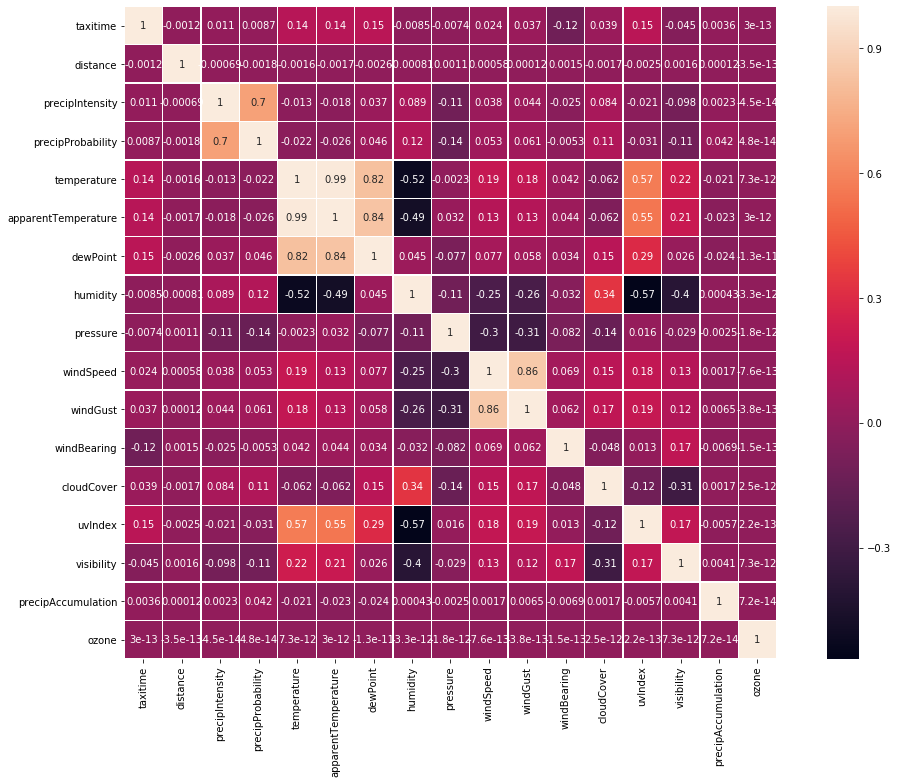

In [569]:
#Display the correlation matrix between the variables 
base_correlation = df_train.drop(['flight_dt', 'AOBT', 'ATOT', 'AOBT_hourly'], axis=1)
corrMatrix = base_correlation.corr()
plt.figure(figsize = (18,12))
sns.heatmap(corrMatrix, annot=True, square=True, linewidths=.3)
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

<Figure size 1008x1008 with 0 Axes>

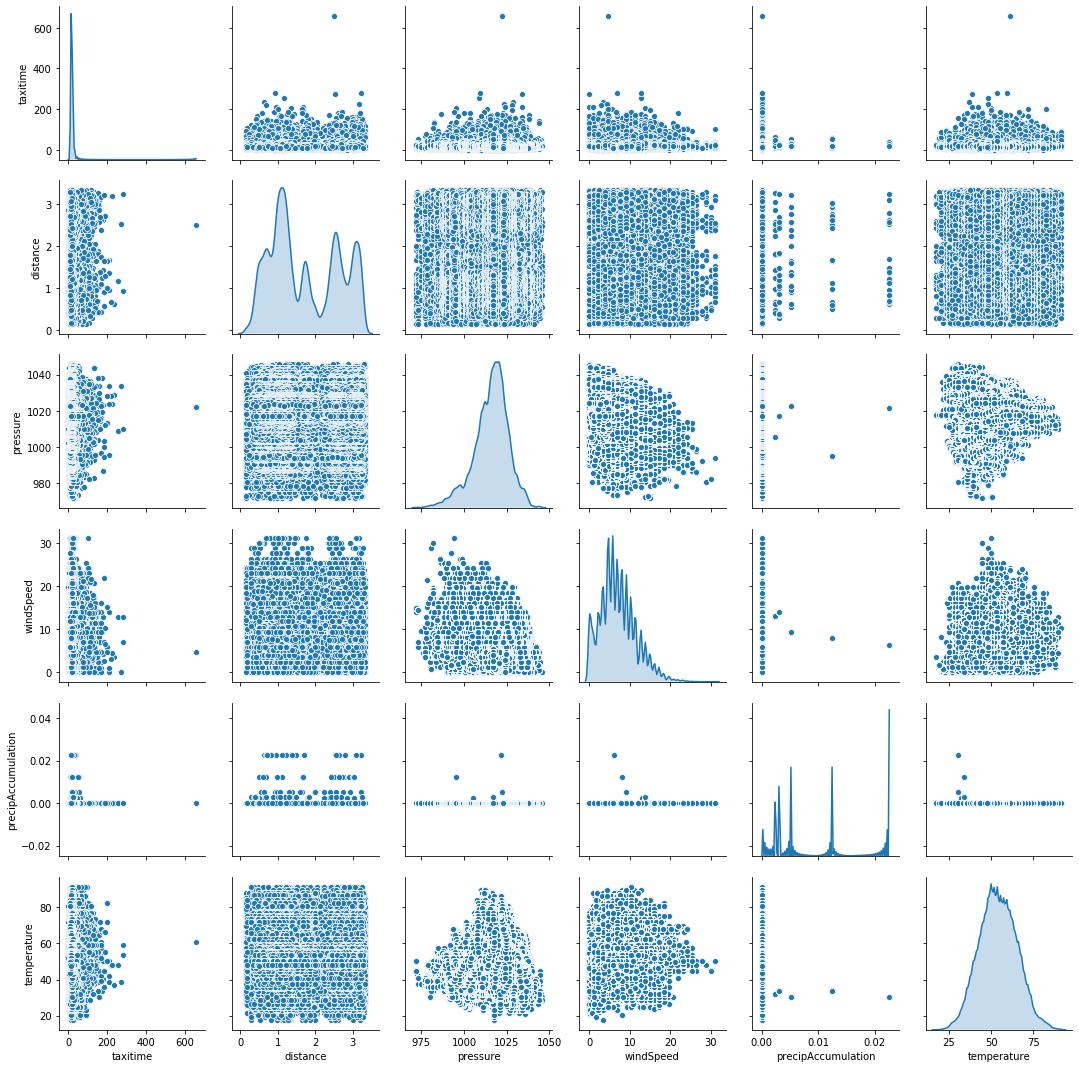

In [572]:
base_pairplot = df_train[['taxitime', 'distance', 'pressure', 'windSpeed', 'precipAccumulation', 'temperature']]
plt.figure(figsize=(14, 14))

sns.pairplot(base_pairplot, diag_kind='kde')

### Time series analysis

In [576]:
# Set date as index
df_ts = df_train.set_index('AOBT')
df_ts = df_ts.drop(['flight_dt', 'ATOT', 'AOBT_hourly'], axis=1)

<Figure size 432x288 with 0 Axes>

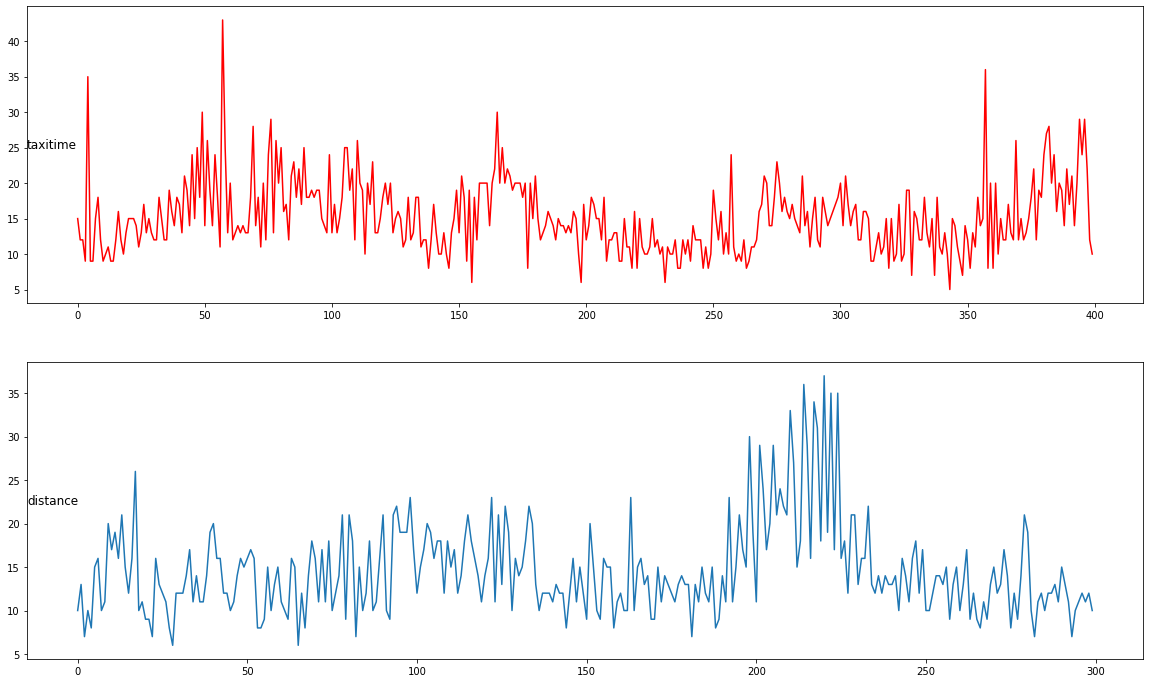

In [600]:
#The models ARIMA etc won't work on this data where no pattern can be found
plt.figure(figsize=(20,12)) #set the figure size

plt.subplot(2, 1, 1)
values_1 = df_ts[['taxitime']].values
plt.plot(values_1[300:700], color = 'red')    
plt.title('taxitime', y=0.5, loc='left')

plt.subplot(2, 1, 2)
values_2 = df_ts[['taxitime']].values
plt.plot(values_2[5000:5300])    
plt.title('distance', y=0.5, loc='left')

plt.show()

# DATA PREPARATION

## Data cleaning

### Missing values cleaning

### Deal with the outliers

## Features engineering

## Computing Q and N

In [1]:
#Checking if a date is in the interval [date1,date2]
def CheckDateInInterval(date,date1,date2):
    if date >= date1 and date2 >= date:
        return 1
    else:
        return 0

#Function filtering on the date to have less computations during the loop "for"
def FilterDates(df,flight_date,index):  
    return df[(abs(df["flight_dt"]-flight_date)<=pd.Timedelta(days=1))&(df.index!=index)]

# Computing Q and N for each row of the dataset
df_airport['N'] = pd.Series([0 for x in range(len(df_airport))])
df_airport['Q'] = pd.Series([0 for x in range(len(df_airport))])

for index, row in df_airport.iterrows(): 
    df_filtered = FilterDates(df_airport, row["flight_dt"], index)
    Q=0
    N=0
    for index2, row2 in df_filtered.iterrows():
        N += CheckDateInInterval(row["AOBT"],row2["AOBT"],row2["ATOT"])
        Q += CheckDateInInterval(row2["ATOT"],row["AOBT"],row["ATOT"])
    df_airport["N"].iloc[index] = N
    df_airport["Q"].iloc[index] = Q
    
df_airport.head(20)

NameError: name 'pd' is not defined

In [37]:
df_airport.head()

,flight_dt,aircraft_model,AOBT,ATOT,Stand,Runway,taxitime,AOBT_hourly,runway_stand
0,2015-01-01 06:00:00,B737-800 WINGLETS,2015-01-01 05:56:00,2015-01-01 06:05:00,STAND_62,RUNWAY_4,9.0,2015-01-01 06:00:00,RUNWAY_4STAND_62
1,2015-01-01 06:10:00,A320-100/200,2015-01-01 06:08:00,2015-01-01 06:18:00,STAND_153,RUNWAY_4,10.0,2015-01-01 06:00:00,RUNWAY_4STAND_153
2,2015-01-01 06:15:00,A320-100/200,2015-01-01 06:08:00,2015-01-01 06:19:00,STAND_44,RUNWAY_2,11.0,2015-01-01 06:00:00,RUNWAY_2STAND_44
3,2015-01-01 06:20:00,A320-100/200,2015-01-01 06:24:00,2015-01-01 06:36:00,STAND_7,RUNWAY_3,12.0,2015-01-01 06:00:00,RUNWAY_3STAND_7
4,2015-01-01 06:20:00,A319,2015-01-01 06:14:00,2015-01-01 06:27:00,STAND_17,RUNWAY_2,13.0,2015-01-01 06:00:00,RUNWAY_2STAND_17


### Converting Date data

## Features importance & selection

## Split into train and test sets

## Training dataset master creation

In [26]:
# Joining all datasets together